# EDA статистики операций в финтехе
Получился бедноватым из-за всего-лишь одной неприрывной метрики Cancelation_time_in_seconds, из-за которой двумерный анализ не провести. И отсутствия статистики продаж.

In [45]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [23]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Кандидат продуктовый\\2\\drive-download-20221216T194221Z-001'

In [24]:
data_offers = pd.read_csv('data_offers.csv')
data_orders = pd.read_csv('data_orders.csv')

In [25]:
data_offers.head(4)

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030


In [26]:
data_orders.head(4)

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
0,2020-07-22 18:08:07,3000583041974,4,1,198.0
1,2020-07-22 20:57:32,3000583116437,4,0,128.0
2,2020-07-22 12:07:50,3000582891479,4,1,46.0
3,2020-07-22 13:50:20,3000582941169,4,1,62.0


In [27]:
# 334 363 записи ненулевые числовые
data_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [28]:
# 10 716 записи ненулевые числовые
# Для cancellations_time_in_seconds - только для 7303 записи ненулевые
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   order_gk                       10716 non-null  int64  
 2   order_status_key               10716 non-null  int64  
 3   is_courier_assigned_key        10716 non-null  int64  
 4   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 418.7+ KB


In [29]:
# Имеет смысл только для cancellations_time_in_seconds - в среднем время закрытия 175 секунд, высокая вариативность.
# По квартилям - 45-187 секунд
data_orders.describe()

,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
count,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,3.000598e+12,5.590612,0.262598,157.892021
std,2.396261e+07,2.328845,0.440066,213.366963
min,3.000550e+12,4.000000,0.000000,3.000000
25%,3.000583e+12,4.000000,0.000000,45.000000
50%,3.000595e+12,4.000000,0.000000,98.000000
75%,3.000623e+12,9.000000,1.000000,187.500000
max,3.000633e+12,9.000000,1.000000,4303.000000


In [30]:
data_merged = data_orders.merge( data_offers, 
                  how='left', 
                  left_on='order_gk' , 
                  right_on='order_gk'  )

data_merged['offer_is_null'] = 0
data_merged['cancellations_time_in_seconds_is_null'] = 0

data_merged.loc[ np.isnan( data_merged['offer_id']), ['offer_is_null'] ] = 1
data_merged.loc[ np.isnan( data_merged['cancellations_time_in_seconds']), ['cancellations_time_in_seconds_is_null'] ] = 1

data_merged

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,offer_id,offer_is_null,cancellations_time_in_seconds_is_null
0,2020-07-22 18:08:07,3000583041974,4,1,198.0,3.000510e+11,0,0
1,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0
2,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0
3,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0
4,2020-07-22 12:07:50,3000582891479,4,1,46.0,3.000510e+11,0,0
...,...,...,...,...,...,...,...,...
34369,2020-07-22 13:11:35,3000599186906,4,0,36.0,3.000516e+11,0,0
34370,2020-07-22 13:13:55,3000599186962,4,0,4.0,NaN,1,0
34371,2020-07-22 13:17:21,3000599187034,4,1,34.0,3.000516e+11,0,0
34372,2020-07-22 13:16:28,3000599187024,4,0,6.0,NaN,1,0


In [31]:
for i in data_merged.columns[1:]:
    print(f'По полю {i}: {data_merged[ np.isnan( data_merged[i]) ].shape[0]} пустых значений' )

По полю order_gk: 0 пустых значений
По полю order_status_key: 0 пустых значений
По полю is_courier_assigned_key: 0 пустых значений
По полю cancellations_time_in_seconds: 10977 пустых значений
По полю offer_id: 3106 пустых значений
По полю offer_is_null: 0 пустых значений
По полю cancellations_time_in_seconds_is_null: 0 пустых значений


In [32]:
for i in data_merged.columns[1:]:
    print(f"По полю {i}: {data_merged[i].unique()} {data_merged[i].nunique()} значений" )
    print()

По полю order_gk: [3000583041974 3000583116437 3000582891479 ... 3000599187034 3000599187024
 3000592871241] 10716 значений

По полю order_status_key: [4 9] 2 значений

По полю is_courier_assigned_key: [1 0] 2 значений

По полю cancellations_time_in_seconds: [1.980e+02 1.280e+02 4.600e+01 6.200e+01       nan 7.800e+01 1.670e+02
 4.500e+01 7.900e+01 1.880e+02 3.160e+02 1.830e+02 1.200e+02 4.750e+02
 4.100e+01 1.010e+02 9.300e+01 1.170e+02 7.000e+01 1.210e+02 1.560e+02
 5.270e+02 6.500e+01 1.480e+02 7.000e+00 1.040e+02 2.700e+01 1.500e+01
 1.230e+02 1.710e+02 5.400e+01 9.100e+01 2.200e+01 1.450e+02 1.060e+02
 3.310e+02 3.000e+01 4.180e+02 1.070e+02 4.300e+01 7.700e+01 5.930e+02
 2.490e+02 3.100e+01 4.400e+01 5.900e+01 3.180e+02 1.300e+01 3.270e+02
 8.360e+02 4.590e+02 6.000e+01 3.800e+01 6.300e+01 5.500e+01 2.060e+02
 2.000e+01 2.800e+01 1.140e+02 8.400e+01 1.910e+02 3.900e+01 6.700e+01
 7.100e+01 2.100e+01 9.000e+00 8.000e+00 1.790e+02 1.000e+01 2.320e+02
 1.900e+01 1.890e+02 4.800e+01 

In [33]:
data_merged['order_datetime_1'] = data_merged['order_datetime'].apply(lambda x: datetime.datetime.strptime(
    x, '%Y-%m-%d %H:%M:%S'
)
)

data_merged['order_year'] = data_merged['order_datetime_1'].apply(lambda x: x.year)
data_merged['order_month'] = data_merged['order_datetime_1'].apply(lambda x: x.month)
data_merged['order_day'] = data_merged['order_datetime_1'].apply(lambda x: x.day)
data_merged['order_hour'] = data_merged['order_datetime_1'].apply(lambda x: x.hour)
data_merged['order_minute'] = data_merged['order_datetime_1'].apply(lambda x: x.minute)

data_merged

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,offer_id,offer_is_null,cancellations_time_in_seconds_is_null,order_datetime_1,order_year,order_month,order_day,order_hour,order_minute
0,2020-07-22 18:08:07,3000583041974,4,1,198.0,3.000510e+11,0,0,2020-07-22 18:08:07,2020,7,22,18,8
1,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0,2020-07-22 20:57:32,2020,7,22,20,57
2,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0,2020-07-22 20:57:32,2020,7,22,20,57
3,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0,2020-07-22 20:57:32,2020,7,22,20,57
4,2020-07-22 12:07:50,3000582891479,4,1,46.0,3.000510e+11,0,0,2020-07-22 12:07:50,2020,7,22,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34369,2020-07-22 13:11:35,3000599186906,4,0,36.0,3.000516e+11,0,0,2020-07-22 13:11:35,2020,7,22,13,11
34370,2020-07-22 13:13:55,3000599186962,4,0,4.0,NaN,1,0,2020-07-22 13:13:55,2020,7,22,13,13
34371,2020-07-22 13:17:21,3000599187034,4,1,34.0,3.000516e+11,0,0,2020-07-22 13:17:21,2020,7,22,13,17
34372,2020-07-22 13:16:28,3000599187024,4,0,6.0,NaN,1,0,2020-07-22 13:16:28,2020,7,22,13,16


In [34]:
data_merged.columns

Index(['order_datetime', 'order_gk', 'order_status_key',
       'is_courier_assigned_key', 'cancellations_time_in_seconds', 'offer_id',
       'offer_is_null', 'cancellations_time_in_seconds_is_null',
       'order_datetime_1', 'order_year', 'order_month', 'order_day',
       'order_hour', 'order_minute'],
      dtype='object')

In [35]:
# Данные только по часам и секундам
for col in ['order_year', 'order_month', 'order_day', 'order_hour', 'order_minute']:
    print( data_merged.groupby(col).agg(
        {'order_gk' : ['nunique'], 
         'cancellations_time_in_seconds' : ['min', 'mean', 'max']
        }) ); print()

           order_gk cancellations_time_in_seconds                    
            nunique                           min        mean     max
order_year                                                           
2020          10716                           3.0  165.655084  4303.0

            order_gk cancellations_time_in_seconds                    
             nunique                           min        mean     max
order_month                                                           
7              10716                           3.0  165.655084  4303.0

          order_gk cancellations_time_in_seconds                    
           nunique                           min        mean     max
order_day                                                           
22           10716                           3.0  165.655084  4303.0

           order_gk cancellations_time_in_seconds                    
            nunique                           min        mean     max
order_hour       

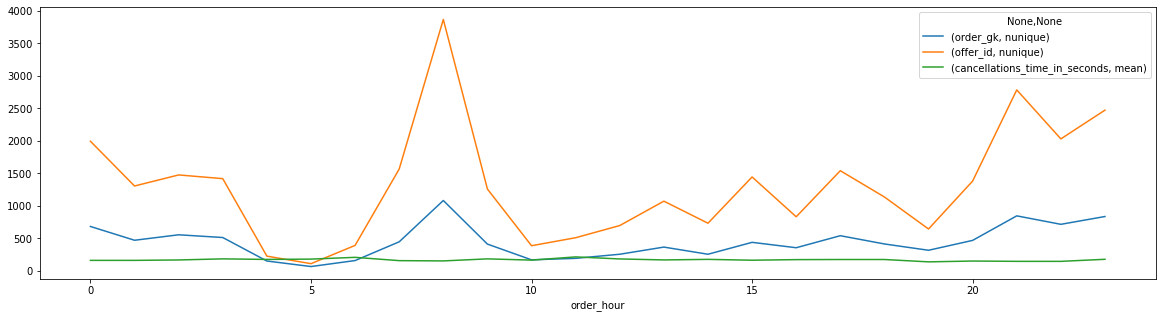

In [36]:
# В 8 часов пик заказов 
# Вечером количество заказов нарастает  без значительного роста закрытий
data_merged.groupby('order_hour').agg(
        {'order_gk' : ['nunique'], 
         'offer_id' : ['nunique'],
         'cancellations_time_in_seconds' : ['mean']
        }).plot(figsize=(20,5));

In [37]:
ds_1 = data_merged.groupby(
    ['order_status_key','is_courier_assigned_key']
)[['order_gk']].nunique().reset_index().set_index('order_status_key')

ds_2 = data_merged.groupby(
    ['order_status_key']
)[['order_gk']].nunique().reset_index().set_index('order_status_key')

ds_2['total'] = data_merged['order_gk'].nunique()

ds_3 = ds_1.join(ds_2,  lsuffix='', rsuffix='_total_group')

ds_3['order_gk_rate'] = ds_3['order_gk'] / ds_3['order_gk_total_group']
ds_3['order_gk_total_group_rate'] = ds_3['order_gk_total_group'] / ds_3['total']


# Для 9го статуса почти нет присвоенных ключей курьерам.
# Статусы заказов делятся как 68% к 31%
ds_3

,is_courier_assigned_key,order_gk,order_gk_total_group,total,order_gk_rate,order_gk_total_group_rate
order_status_key,,,,,,
4,0,4496,7307,10716,0.61530,0.681878
4,1,2811,7307,10716,0.38470,0.681878
9,0,3406,3409,10716,0.99912,0.318122
9,1,3,3409,10716,0.00088,0.318122


In [38]:
ds_11 = data_merged.groupby(
    ['order_status_key','is_courier_assigned_key']
)[['cancellations_time_in_seconds']].mean().reset_index().set_index('order_status_key')

ds_12 = data_merged.groupby(
    ['order_status_key']
)[['cancellations_time_in_seconds']].mean().reset_index().set_index('order_status_key')

ds_12['total'] = data_merged['cancellations_time_in_seconds'].mean()

ds_13 = ds_11.join(ds_12,  lsuffix='', rsuffix='_total_group')

ds_13['cancellations_time_in_seconds_level'] = ds_13['cancellations_time_in_seconds'] / ds_13['cancellations_time_in_seconds_total_group']
ds_13['cancellations_time_in_seconds_group_level'] = ds_13['cancellations_time_in_seconds_total_group'] / ds_13['total']


# Для 9го статуса почти нет времени закрытия
# Время закрытия без ключа - в 2 раза меньше, чем с присвоенным ключом
ds_13

,is_courier_assigned_key,cancellations_time_in_seconds,cancellations_time_in_seconds_total_group,total,cancellations_time_in_seconds_level,cancellations_time_in_seconds_group_level
order_status_key,,,,,,
4,0,121.771972,165.655084,165.655084,0.735093,1.0
4,1,238.010302,165.655084,165.655084,1.436782,1.0
9,0,NaN,NaN,165.655084,NaN,NaN
9,1,NaN,NaN,165.655084,NaN,NaN


In [39]:
corr_matrix = data_merged[['order_year', 'order_month', 'order_day',
       'order_hour', 'order_minute', 'cancellations_time_in_seconds_is_null']].corr().iloc[3:, 3:]

#Корреляция времени закрытия по времени отсутствует
corr_matrix

,order_hour,order_minute,cancellations_time_in_seconds_is_null
order_hour,1.000000,0.030859,-0.041548
order_minute,0.030859,1.000000,0.012491
cancellations_time_in_seconds_is_null,-0.041548,0.012491,1.000000


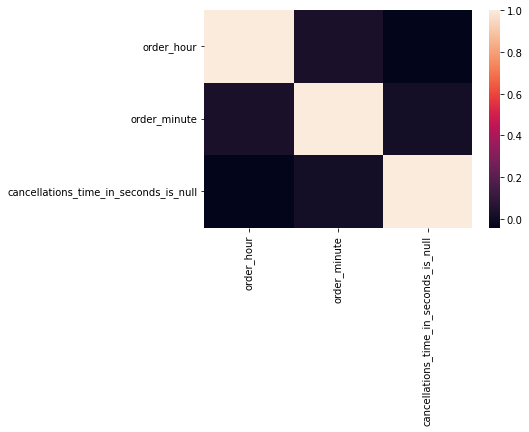

In [42]:
sns.heatmap(corr_matrix);

In [43]:
data_merged

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,offer_id,offer_is_null,cancellations_time_in_seconds_is_null,order_datetime_1,order_year,order_month,order_day,order_hour,order_minute
0,2020-07-22 18:08:07,3000583041974,4,1,198.0,3.000510e+11,0,0,2020-07-22 18:08:07,2020,7,22,18,8
1,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0,2020-07-22 20:57:32,2020,7,22,20,57
2,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0,2020-07-22 20:57:32,2020,7,22,20,57
3,2020-07-22 20:57:32,3000583116437,4,0,128.0,3.000510e+11,0,0,2020-07-22 20:57:32,2020,7,22,20,57
4,2020-07-22 12:07:50,3000582891479,4,1,46.0,3.000510e+11,0,0,2020-07-22 12:07:50,2020,7,22,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34369,2020-07-22 13:11:35,3000599186906,4,0,36.0,3.000516e+11,0,0,2020-07-22 13:11:35,2020,7,22,13,11
34370,2020-07-22 13:13:55,3000599186962,4,0,4.0,NaN,1,0,2020-07-22 13:13:55,2020,7,22,13,13
34371,2020-07-22 13:17:21,3000599187034,4,1,34.0,3.000516e+11,0,0,2020-07-22 13:17:21,2020,7,22,13,17
34372,2020-07-22 13:16:28,3000599187024,4,0,6.0,NaN,1,0,2020-07-22 13:16:28,2020,7,22,13,16


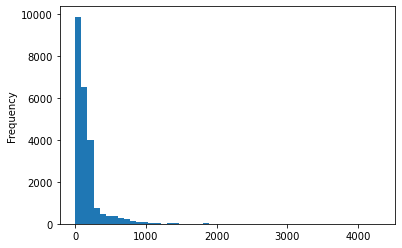

In [44]:
# Заказы по времени закрытия распределены Гамма-распределением
data_merged['cancellations_time_in_seconds'].plot.hist(by=None, bins=50);